AI project with ANN Algorthim

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

In [2]:
train_df = pd.read_csv('emnist-balanced-train.csv',header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Each column after represents one pixel value (784 total for a 28 x 28 image) 

In [3]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,...,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.00000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.shape

(112800, 785)

`

# We have 112800 rows (images), each described using 784 variables 28X28 pixels plus one column as output variable (the first column)

Creating label dictionary
The output variables' values comprise of 0 to 46 values where 0-9 stands for 0-9 numbers, 10-35 stands for uppercase A-Z and 35+ stand for lowercase alphabets. We will thus create a dictionary which will have these as key and value pairs.

In our dataset, there is a file emnist-balanced-mapping which contains the characters and their ASCII equivalents. We can have the index column as the key of the dictionary and the value ASCII code converted to char as the value of the dictionary.

In [5]:
label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
label_map.head()

C:\Users\Karim Ashraf\AppData\Local\Temp\ipykernel_1820\409051872.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [6]:
#Initialising an empty dictionary
label_dictionary = {}

#Running a loop for ASCII equivalent to character conversion
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [7]:
train_df_new = train_df[train_df[0].isin(np.arange(0, 36))]
train_df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

x_train.shape, y_train.shape

((112800, 784), (112800,))

# Visualising Sample data

In [39]:
sample_image = x_train.iloc[28] #input number for any image 
sample_label = y_train.iloc[28] # equal above 
sample_image.shape, sample_label

((784,), 29)

Label entry  is :  h


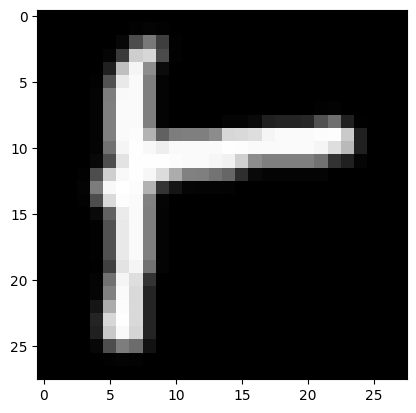

In [38]:
print("Label entry  is : ", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

# a function to rotate and flip and see if it works on the sample image.

Label entry is :  T


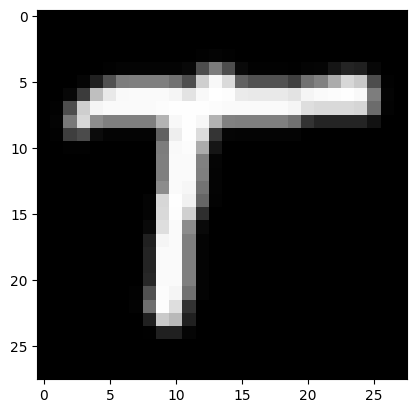

In [40]:
def flip_and_rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry is : ", label_dictionary[sample_label])
plt.imshow(flip_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

 # reshape_and_rotate to all images in X_train

In [41]:
x_train = np.apply_along_axis(flip_and_rotate, 1, x_train.values)
x_train.shape

(112800, 28, 28)

 # Normalizing the Data

In [42]:
#Data Scaling to bring the input values between 0 to 1
x_train = x_train.astype('float32') / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
number_of_classes = y_train.nunique()
number_of_classes

47

In [44]:
y_train = np_utils.to_categorical(y_train,number_of_classes)#Converts a class vector (integers) to binary class matrix
y_train.shape

(112800, 47)

In [45]:
x_train.shape

(112800, 28, 28)

# Reshaping the train data

As tensorflow requires 4D Array, (batch X width X height X channel) and our x_train is 3D array (no. of images X width X height), we will be adding one more dimension to the x_train

In [46]:
x_train = x_train.reshape(-1,28,28, 1)
x_train.shape

(112800, 28, 28, 1)

# Split arrays or matrices into random train and test subsets.


random_state : Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

In [48]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.15, random_state=88)

# Train and Validation Split

We will be dividing the input dataset into train and validation in the ratio of 90:10 for Model Building

In [49]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [50]:
optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [51]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=1,  validation_split=0.25, callbacks=[early_stopping, mcp_save])

Epoch 1/10
2022/2023 [============================>.] - ETA: 0s - loss: 0.7418 - accuracy: 0.7667
Epoch 1: val_loss improved from inf to 0.47731, saving model to my_model.h5
2023/2023 [==============================] - 74s 36ms/step - loss: 0.7416 - accuracy: 0.7667 - val_loss: 0.4773 - val_accuracy: 0.8360
Epoch 2/10
2023/2023 [==============================] - ETA: 0s - loss: 0.4000 - accuracy: 0.8587
Epoch 2: val_loss improved from 0.47731 to 0.40840, saving model to my_model.h5
2023/2023 [==============================] - 73s 36ms/step - loss: 0.4000 - accuracy: 0.8587 - val_loss: 0.4084 - val_accuracy: 0.8538
Epoch 3/10
2022/2023 [============================>.] - ETA: 0s - loss: 0.3355 - accuracy: 0.8782
Epoch 3: val_loss improved from 0.40840 to 0.38472, saving model to my_model.h5
2023/2023 [==============================] - 74s 36ms/step - loss: 0.3356 - accuracy: 0.8782 - val_loss: 0.3847 - val_accuracy: 0.8650
Epoch 4/10
2023/2023 [==============================] - ETA: 0s -

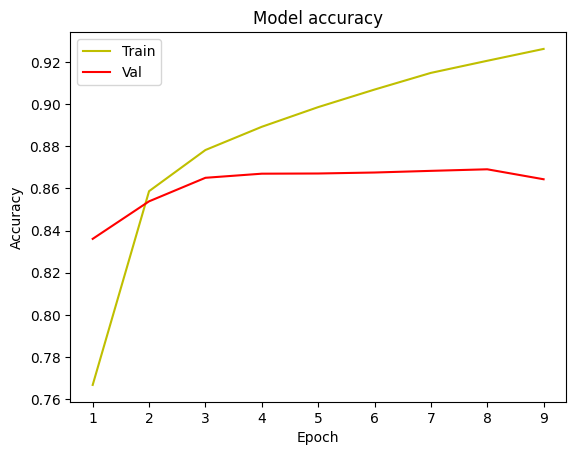

Loss Curve


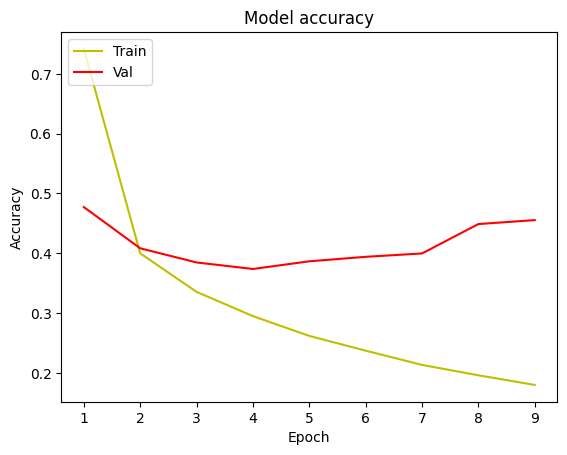

In [52]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'y')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plotgraph(epochs, acc, val_acc)
print('Loss Curve')
plotgraph(epochs, loss, val_loss)

# load_model & summary


In [53]:
model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

# Prediction on the Validation Data

In [54]:
y_pred = model.predict(x_val)
# Finding shape
y_pred.shape

476/476 [==============================] - 4s 8ms/step


(15228, 47)

# some samples with prediction

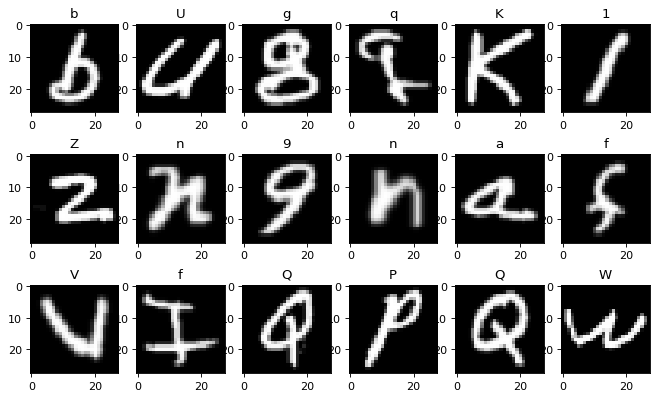

In [71]:
plt.figure(figsize=(10, 6), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)#(nrow,ncol,shareX)
    plt.imshow(x_val[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

 # Validation Accuracy

In [72]:
val_acc = model.evaluate(x_val, y_val)
print('Loss value is ',val_acc[0])
print('Accuracy value is ',val_acc[1])

476/476 [==============================] - 4s 8ms/step - loss: 0.3838 - accuracy: 0.8696
Loss value is  0.38375324010849
Accuracy value is  0.8696480393409729


# Predicting the test data that came along with the dataset

In [73]:
test_df = pd.read_csv('emnist-balanced-test.csv', header=None)
test_df.shape

(18800, 785)

In [74]:
test_df_new = test_df[test_df[0].isin(np.arange(10, 36))]
test_df_new.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,10400.000000,10400.0,10400.0,10400.0,10400.0,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,...,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0,10400.0
mean,22.500000,0.0,0.0,0.0,0.0,0.010962,0.035673,0.020385,0.016923,0.020385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.500361,0.0,0.0,0.0,0.0,0.710989,2.368003,1.417666,1.199698,2.039981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,16.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,22.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,29.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Splitting into x and y
x_test = test_df_new.loc[:, 1:]
y_test = test_df_new.loc[:, 0]

x_test.shape, y_test.shape

((10400, 784), (10400,))

In [76]:
#Flipinng and rotating
x_test = np.apply_along_axis(flip_and_rotate, 1, x_test.values)
y_test = np_utils.to_categorical(y_test,number_of_classes)

x_test.shape, y_test.shape

((10400, 28, 28), (10400, 47))

In [77]:
#Normalisation
x_test = x_test.astype('float32') / 255

In [78]:
#Reshaping (Changing Dimension)
x_test = x_test.reshape(-1, 28, 28, 1)
x_test.shape

(10400, 28, 28, 1)

In [79]:
#Evaluating Model
test_acc = model.evaluate(x_test, y_test)

325/325 [==============================] - 3s 9ms/step - loss: 0.3459 - accuracy: 0.8700


In [80]:
y_pred_test = model.predict(x_test)
# Finding shape
y_pred_test.shape

325/325 [==============================] - 3s 8ms/step


(10400, 47)

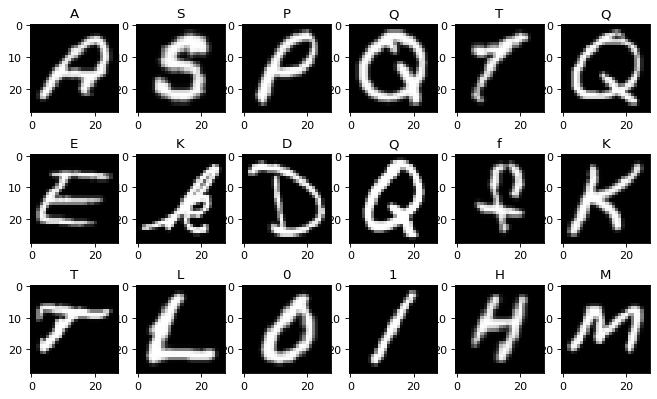

In [82]:
# Visualising some predicted values
plt.figure(figsize=(10, 6), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred_test[i].argmax()])